In [11]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

%matplotlib inline

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [13]:
model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

hist = model.fit(X_train, y_train, 
    batch_size=32, epochs=50, #epochs=50
    verbose=1,
    validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

model.save_weights('cifar10-cnn-weight.h5')

# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
# plt.title('Accuracy')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Loss')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 143s 3ms/step - loss: 1.5365 - accuracy: 0.4377 - val_loss: 1.2028 - val_accuracy: 0.5710
Epoch 2/50
50000/50000 [==============================] - 141s 3ms/step - loss: 1.1322 - accuracy: 0.5988 - val_loss: 0.9338 - val_accuracy: 0.6699
Epoch 3/50
50000/50000 [==============================] - 156s 3ms/step - loss: 0.9861 - accuracy: 0.6507 - val_loss: 0.8445 - val_accuracy: 0.7048
Epoch 4/50
50000/50000 [==============================] - 139s 3ms/step - loss: 0.8876 - accuracy: 0.6876 - val_loss: 0.8311 - val_accuracy: 0.7095
Epoch 5/50
50000/50000 [==============================] - 140s 3ms/step - loss: 0.8286 - accuracy: 0.7090 - val_loss: 0.7785 - val_accuracy: 0.7271
Epoch 6/50
50000/50000 [==============================] - 139s 3ms/step - loss: 0.7744 - accuracy: 0.7270 - val_loss: 0.7214 - val_accuracy: 0.7519
Epoch 7/50
50000/50000 [==============================] - 140s

In [14]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import img_to_array, load_img

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
im_size = 32 * 32 * 3

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

10000/10000 [==============================] - 5s 466us/step
정답률= 0.795199990272522 loss= 0.7529531242847443

predict_classes= [1]


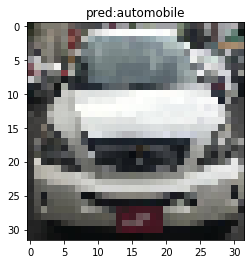

In [16]:
model.load_weights('cifar10-cnn-weight.h5')
model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

#model.summary()

score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# img_pred=model.predict_classes(X_test)

# plt.figure(figsize=(10,10))
# for i in range(1):
#     rand_num=np.random.randint(0,10000)
#     cifar_img=plt.subplot(5,5,i+1)
#     plt.imshow(X_test[rand_num])
#     plt.tick_params(labelbottom='off')
#     plt.tick_params(labelleft='off')
#     plt.title('pred:{0},ans:{1}'.format(img_pred[rand_num], y_test[rand_num]))

# plt.show()

temp_img=load_img("test-car.png",target_size=(32,32))

#화상을 배열로 변환
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=', img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(labels[img_pred[0]]))
plt.show()
